In [111]:
# The aim of this project is to clean the job posting data which has almost 800k jobs that I obtained form hugging face and to make it presentable.
# This is to be followed by analyzing the data to spot trends in it and then plotting it using matplotlib.

#1. Installing and importing tools


In [112]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install datasets
from datasets import load_dataset
load_dataset('lukebarousse/data_jobs')

DatasetDict({
    train: Dataset({
        features: ['job_title_short', 'job_title', 'job_location', 'job_via', 'job_schedule_type', 'job_work_from_home', 'search_location', 'job_posted_date', 'job_no_degree_mention', 'job_health_insurance', 'job_country', 'salary_rate', 'salary_year_avg', 'salary_hour_avg', 'company_name', 'job_skills', 'job_type_skills'],
        num_rows: 785741
    })
})

In [113]:
dataset = load_dataset('lukebarousse/data_jobs')
dataset

DatasetDict({
    train: Dataset({
        features: ['job_title_short', 'job_title', 'job_location', 'job_via', 'job_schedule_type', 'job_work_from_home', 'search_location', 'job_posted_date', 'job_no_degree_mention', 'job_health_insurance', 'job_country', 'salary_rate', 'salary_year_avg', 'salary_hour_avg', 'company_name', 'job_skills', 'job_type_skills'],
        num_rows: 785741
    })
})

In [114]:
dataset['train']

Dataset({
    features: ['job_title_short', 'job_title', 'job_location', 'job_via', 'job_schedule_type', 'job_work_from_home', 'search_location', 'job_posted_date', 'job_no_degree_mention', 'job_health_insurance', 'job_country', 'salary_rate', 'salary_year_avg', 'salary_hour_avg', 'company_name', 'job_skills', 'job_type_skills'],
    num_rows: 785741
})

In [115]:
df = dataset['train'].to_pandas()

In [116]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


# 2. Inspecting data one by one and making suitable changes
null values have not been removed because they might provide insights on the legitimacy and authenticity of the job posting.
UPDATE- I later realized that removing null values is way more practical and helps out greatly, cnotrary to what i thought earlier. thus at the end of this section a new df has been created called dfnona which has no null values.

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [118]:
# Just came to my attention that a lot of these postings are hollow and do not have key values in them, they potentially contaminate our data and thus need to be fixed.
df.isna()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True,True
1,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False
785737,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False
785738,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False
785739,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False


FOR JOB_TITLE_SHORT

In [119]:
# I think it would be worth doing the same for every column to make sure our data is not contaminated.
#for job_title_short
df['job_title_short'].isna().sum()
# seems fine

0

FOR JOB_TITLE

In [120]:
# for job_title
# has one fallacy
df['job_title'].isna().sum()

1

In [121]:
df[df['job_title'].isna()]

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
784492,Data Engineer,None,None,via Jobs In France - Mustakbil.com,None,False,Saint Lucia,2023-12-14 07:32:05,False,False,None,None,NaN,NaN,None,None,None


In [122]:
# this is clearly a fake job posting / mistake in the data as it has no values at all. We will remove it.
df[df['job_title'].isna()].index

Index([784492], dtype='int64')

In [123]:
df.drop(df[df['job_title'].isna()].index, axis=0, inplace=True)
df['job_title'].isna().sum()
# the trash job posting has been removed and job_title is fine. Moving on.

0

FOR JOB_LOCATION.
(new column created for filters)

In [124]:
# job_location
df['job_location'].isna().sum()
# since this is also an important aspect of a job we should give people the option to filter it.

1044

In [125]:
# inspecting it just to check
null_job_location =df[df['job_location'].isna()]
full_job_location = df[df['job_location'].notna()]
null_job_location
#seems to be in order lets create a new column for it

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
43,Senior Data Engineer,Sr SQL Database Engineer with Data Warehouse /...,None,via LinkedIn,Contractor,False,"Texas, United States",2023-09-13 13:06:55,True,False,United States,hour,NaN,97.5,Phaxis,"['sql', 'sql server']","{'databases': ['sql server'], 'programming': [..."
568,Data Engineer,Data Engineer,None,via LinkedIn,Full-time,False,"Illinois, United States",2023-10-20 13:13:12,False,False,United States,None,NaN,NaN,"Susquehanna International Group, LLP (SIG)","['shell', 'python', 'mysql', 'mariadb', 'oracl...","{'cloud': ['oracle'], 'databases': ['mysql', '..."
814,Senior Data Scientist,"Senior Data Scientist (Greater Boston Area, MA)",None,via Built In Boston,Full-time,False,"New York, United States",2023-04-14 13:02:26,False,False,United States,None,NaN,NaN,Deloitte,"['python', 'aws', 'azure', 'gcp', 'keras', 'te...","{'cloud': ['aws', 'azure', 'gcp'], 'libraries'..."
842,Data Engineer,Data Engineer,None,via LinkedIn,Full-time,False,"Texas, United States",2023-10-23 13:05:37,True,False,United States,hour,NaN,55.0,Agility Partners,"['nosql', 'sql', 'hadoop']","{'libraries': ['hadoop'], 'programming': ['nos..."
1206,Data Analyst,SQL Data Analyst,None,via LinkedIn,Full-time,False,"New York, United States",2023-04-28 13:00:40,True,False,United States,None,NaN,NaN,Robert Half,"['sql', 't-sql', 'sql server', 'azure', 'ssrs'...","{'analyst_tools': ['ssrs', 'ssis'], 'cloud': [..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780208,Cloud Engineer,광고 플랫폼 개발,None,via Trabajo.org - 작업 검색,Full-time,False,South Korea,2023-01-30 05:33:19,False,False,South Korea,None,NaN,NaN,티맵모빌리티,"['nosql', 'mongodb', 'mongodb', 'java', 'kotli...","{'cloud': ['oracle', 'aws'], 'databases': ['mo..."
780884,Data Engineer,Data Engineer,None,via BeBee,Full-time,False,South Korea,2023-01-02 07:09:34,False,False,South Korea,None,NaN,NaN,Class101,"['aws', 'airflow', 'kafka', 'docker']","{'cloud': ['aws'], 'libraries': ['airflow', 'k..."
780893,Senior Data Analyst,Senior Business Intelligence Data Analyst,None,via BeBee,Full-time,False,South Korea,2023-01-02 07:09:31,True,False,South Korea,None,NaN,NaN,Novo Nordisk,None,None
781197,Business Analyst,Analyst,None,via LinkedIn,Full-time,False,"New York, United States",2023-10-22 06:00:17,False,False,United States,None,NaN,NaN,Coffman,"['python', 'excel', 'tableau']","{'analyst_tools': ['excel', 'tableau'], 'progr..."


In [126]:

# perfect. job_location done, moving on.

FOR JOB_VIA

In [127]:
df['job_via'].isna().sum()

8

In [128]:
df[df['job_via'].isna()]

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
4981,Data Analyst,Data Analyst,"Mt Pleasant, WI",None,Full-time,False,"Illinois, United States",2023-07-30 13:01:48,False,False,United States,hour,NaN,15.0,Jobs Near Me,"['sql', 'javascript', 'sas', 'sas', 'excel', '...","{'analyst_tools': ['sas', 'excel', 'spss'], 'p..."
19686,Data Analyst,Data Analyst,"Sun Prairie, WI",None,Full-time,False,"Illinois, United States",2023-08-12 13:01:41,False,False,United States,hour,NaN,15.0,Jobs Near Me,"['sql', 'javascript', 'sas', 'sas', 'excel', '...","{'analyst_tools': ['sas', 'excel', 'spss'], 'p..."
46401,Data Analyst,Data Analyst,"Oshkosh, WI",None,Full-time,False,"Illinois, United States",2023-08-16 06:02:18,False,False,United States,hour,NaN,15.0,Jobs Near Me,"['sql', 'javascript', 'sas', 'sas', 'excel', '...","{'analyst_tools': ['sas', 'excel', 'spss'], 'p..."
492636,Data Analyst,Data Analyst,"Kenosha, WI",None,Full-time,False,"Illinois, United States",2023-07-04 11:02:11,False,False,United States,hour,NaN,15.0,Jobs Near Me,"['sql', 'javascript', 'sas', 'sas', 'excel', '...","{'analyst_tools': ['sas', 'excel', 'spss'], 'p..."
504028,Data Analyst,Data Analyst,"West Allis, WI",None,Full-time,False,"Illinois, United States",2023-07-31 11:02:21,False,False,United States,hour,NaN,15.0,Jobs Near Me,"['sql', 'javascript', 'sas', 'sas', 'excel', '...","{'analyst_tools': ['sas', 'excel', 'spss'], 'p..."
558213,Data Analyst,Data Analyst,"Racine, WI",None,Full-time,False,"Illinois, United States",2023-08-15 04:02:25,False,False,United States,hour,NaN,15.0,Jobs Near Me,"['sql', 'javascript', 'sas', 'sas', 'excel', '...","{'analyst_tools': ['sas', 'excel', 'spss'], 'p..."
571903,Data Analyst,Data Analyst,"Hobbs, NM",None,Full-time,False,Sudan,2023-06-08 09:58:47,False,False,Sudan,hour,NaN,15.0,Jobs Near Me,"['sql', 'javascript', 'sas', 'sas', 'excel', '...","{'analyst_tools': ['sas', 'excel', 'spss'], 'p..."
609879,Data Analyst,Data Analyst,"Brownsburg, IN",None,Full-time,False,"Illinois, United States",2023-03-11 12:03:48,False,False,United States,hour,NaN,15.0,Jobs Near Me,"['sql', 'javascript', 'sas', 'sas', 'excel', '...","{'analyst_tools': ['sas', 'excel', 'spss'], 'p..."


In [129]:
# it seems like jobs near me is a company that aggregates the jobs in your area and acts like a local linkedin. It should then be under the job_via section not the company name section.
# another explanation is that jobs near me itself is looking for people to work there. The latter seems more likely.
# i dont think they exactly qualify as null values because the company is advertising their job on their own website. Thus I will just replace those none values with job_via.
df['job_via'].fillna(df['company_name'], inplace=True)
df['job_via'].isna().sum()


<ipython-input-129-1ca867197e3b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['job_via'].fillna(df['company_name'], inplace=True)


0

FOR JOB_SCHEDULE_TYPE

In [130]:
# job schedule type
# i want to check how many types are actually available first. might be full time for all the jobs, removing the need to keep the column entirely.
df['job_schedule_type'].unique()

array(['Full-time', 'Contractor and Temp work',
       'Full-time and Internship', 'Temp work', 'Contractor',
       'Full-time and Part-time', 'Full-time and Temp work',
       'Full-time and Contractor', 'Part-time', 'Internship', None,
       'Part-time and Contractor', 'Temp work and Internship',
       'Full-time, Part-time, and Contractor',
       'Full-time, Part-time, and Internship',
       'Full-time, Contractor, and Temp work',
       'Full-time, Part-time, and Temp work',
       'Full-time, Temp work, and Internship',
       'Full-time, Contractor, and Internship',
       'Part-time and Internship', 'Contractor and Internship',
       'Part-time and Full-time', 'Part-time and Temp work',
       'Full-time and Volunteer', 'Contractor, Temp work, and Internship',
       'Full-time and Per diem', 'Per diem', 'Volunteer',
       'Part-time, Contractor, and Temp work',
       'Full-time, Temp work, and Per diem',
       'Part-time, Temp work, and Internship', 'Contractor and Par

In [131]:
# seems i was wrong there are different types of jobs in this dataset
# the foreign words need to be replaced into english. Using internet to find their meanings in english and creating a dictionary for it,
translations = {'Pekerjaan tetap' : 'Full-time',
                'Kontraktor' : 'Contractor',
                'Per diem' : 'Per day'}
df['job_schedule_type'] = df['job_schedule_type'].replace(translations)
df['job_schedule_type'].unique()
# per diem didnt translate completely for some reason

array(['Full-time', 'Contractor and Temp work',
       'Full-time and Internship', 'Temp work', 'Contractor',
       'Full-time and Part-time', 'Full-time and Temp work',
       'Full-time and Contractor', 'Part-time', 'Internship', None,
       'Part-time and Contractor', 'Temp work and Internship',
       'Full-time, Part-time, and Contractor',
       'Full-time, Part-time, and Internship',
       'Full-time, Contractor, and Temp work',
       'Full-time, Part-time, and Temp work',
       'Full-time, Temp work, and Internship',
       'Full-time, Contractor, and Internship',
       'Part-time and Internship', 'Contractor and Internship',
       'Part-time and Full-time', 'Part-time and Temp work',
       'Full-time and Volunteer', 'Contractor, Temp work, and Internship',
       'Full-time and Per diem', 'Per day', 'Volunteer',
       'Part-time, Contractor, and Temp work',
       'Full-time, Temp work, and Per diem',
       'Part-time, Temp work, and Internship', 'Contractor and Part

FOR JOB_WORK_FROM_HOME

In [132]:
#job_work_from_home
df['job_work_from_home'].isna().sum()
#okay job work form home seems good


0

FOR SEARCH_LOCATION

In [133]:
# because this shows where the person searched for a particular job, it does not help us in any way. thus we shall remove it.
df.drop('search_location', axis=1, inplace=True)
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Full-time,False,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Full-time,False,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Full-time,False,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Full-time,False,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


FOR JOB_POSTED_DATE

In [134]:
# why is job post date an object instead of datetime? Need to correct it.
df['job_posted_date'].info()

<class 'pandas.core.series.Series'>
Index: 785740 entries, 0 to 785740
Series name: job_posted_date
Non-Null Count   Dtype 
--------------   ----- 
785740 non-null  object
dtypes: object(1)
memory usage: 12.0+ MB


In [135]:
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_posted_date'].info()

<class 'pandas.core.series.Series'>
Index: 785740 entries, 0 to 785740
Series name: job_posted_date
Non-Null Count   Dtype         
--------------   -----         
785740 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 12.0 MB


In [136]:
# Does not seem to have any null values.
df['job_posted_date'].isna().sum()
# job_posted_date is fine.

0

FOR JOB_NO_DEGREE_MENTION

In [137]:
df['job_no_degree_mention'].isna().sum()
# seems fine.

0

FOR JOB_HEALTH_INSURANCE

In [138]:
df['job_health_insurance'].isna().sum()
# seems fine as well.

0

FOR JOB_COUNTRY

In [139]:
df['job_country'].isna().sum()

48

In [140]:
# inspecting it just in case,
null_job_country = df[df['job_country'].isna()]
full_job_country = df[df['job_country'].notna()]
null_job_country
# null values here might have some trends to analyze

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
4236,Software Engineer,Sr. Staff Engineer - Golang,Sierra Leone,via Job Vacancies And Recruitment In Sierra Leone,Full-time,False,2023-04-12 14:11:30,True,False,None,None,NaN,NaN,EDB,"['go', 'kubernetes', 'flow']","{'other': ['kubernetes', 'flow'], 'programming..."
8228,Software Engineer,Senior Product Analyst II,Gabon,via Emploi.ga,Full-time,False,2023-05-08 14:06:47,True,False,None,None,NaN,NaN,MONGODB,"['mongodb', 'mongodb']","{'databases': ['mongodb'], 'programming': ['mo..."
17524,Software Engineer,Senior Software Engineer,Anywhere,via Jobgether,Full-time,True,2023-05-15 14:46:01,False,True,None,None,NaN,NaN,Sift,"['java', 'python', 'spark', 'airflow', 'docker...","{'libraries': ['spark', 'airflow'], 'other': [..."
22974,Software Engineer,Sr. Software Engineer - Python Tooling,Sierra Leone,via Job Vacancies And Recruitment In Sierra Leone,Full-time,False,2023-04-12 14:11:30,True,False,None,None,NaN,NaN,EDB,"['python', 'ansible']","{'other': ['ansible'], 'programming': ['python']}"
43834,Data Analyst,Analista de datos y reporting,Anywhere,via LinkedIn Grenada,Full-time,True,2023-06-30 07:13:05,False,False,None,None,NaN,NaN,Fundacion I+D de software libre,"['sql', 'power bi', 'tableau']","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
72461,Data Scientist,Data Scientist,Sierra Leone,via Job Vacancies And Recruitment In Sierra Leone,"Full-time, Contractor, and Temp work",False,2023-10-18 01:07:34,False,False,None,None,NaN,NaN,DEEL,None,None
135144,Business Analyst,Analyst,"Freetown, Sierra Leone",via LinkedIn,Full-time,False,2023-10-10 08:46:04,False,False,None,None,NaN,NaN,Tony Blair Institute for Global Change,['excel'],{'analyst_tools': ['excel']}
144646,Software Engineer,OpenTelemetry Instrumentation Senior Engineer ...,Sierra Leone,via Job Vacancies And Recruitment In Sierra Leone,Full-time,False,2023-05-10 09:04:58,True,False,None,None,NaN,NaN,GRAFANA LABS,['kubernetes'],{'other': ['kubernetes']}
160374,Software Engineer,Senior Software Engineer — Grafana k6 OSS - Re...,Anywhere,via Jobgether,Full-time,True,2023-10-20 16:16:22,True,False,None,None,NaN,NaN,Grafana Labs,"['go', 'python', 'javascript', 'aws', 'github'...","{'cloud': ['aws'], 'other': ['github', 'docker..."
161499,Data Analyst,National Consultant: SBC Data Analyst – Rumour...,"Freetown, Sierra Leone",via LinkedIn,Full-time,False,2023-06-01 17:10:01,False,False,None,None,NaN,NaN,UNICEF,"['power bi', 'excel', 'flow']","{'analyst_tools': ['power bi', 'excel'], 'othe..."


FOR SALARY_RATE

In [141]:
# is the entire salary rate column na?
df['salary_rate'].isna().sum()

752673

In [142]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Full-time,False,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Full-time,False,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Full-time,False,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Full-time,False,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [143]:
# 752674/785741 salary rate column is null but some of the rows does have data in it.
null_salary_rate =df[df['salary_rate'].isna()]
full_salary_rate = df[df['salary_rate'].notna()]
df['salary_rate'].unique()

array([None, 'year', 'hour', 'month', 'day', 'week'], dtype=object)

FOR SALARY_YEAR_AVG

In [144]:
# since this is just ints lets start by getting an overview
df.describe()

,job_posted_date,salary_year_avg,salary_hour_avg
count,785740,22003.000000,10662.000000
mean,2023-06-25 16:01:52.986074880,123286.274072,47.016598
min,2023-01-01 00:00:04,15000.000000,8.000000
25%,2023-03-20 10:05:47.500000,90000.000000,27.500000
50%,2023-06-29 06:11:13.500000,115000.000000,45.980000
75%,2023-09-27 01:01:11.500000,150000.000000,61.159996
max,2023-12-31 23:59:58,960000.000000,391.000000
std,NaN,48312.449482,21.890738


In [145]:
# the minimum salary feels suspiciously low.
df['salary_year_avg'].min()

15000.0

In [146]:
# let's find where its at.
df['salary_year_avg'].idxmin()

665729

In [147]:
df.iloc[665729]

,665729
job_title_short,Data Engineer
job_title,Data Engineer - Hadoop
job_location,Brazil
job_via,via LinkedIn
job_schedule_type,Full-time
job_work_from_home,False
job_posted_date,2023-12-09 10:05:30
job_no_degree_mention,True
job_health_insurance,False
job_country,Brazil


In [148]:
# after some research I realized that a $15k salary in Brazil is actually a respectably high amount. Thus, this was not a fallacy and does not need to be corrected.

In [149]:
# checking for null values now
df['salary_year_avg'].isna().sum()

763737

In [150]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Full-time,False,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Full-time,False,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Full-time,False,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Full-time,False,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [151]:
# 763738/785741 jobs do not mention salary which is arguably one of the most important aspects of a job posting.
null_salary_year_avg = df[df['salary_year_avg'].isna()]
full_salary_year_avg = df[df['salary_year_avg'].notna()]
null_salary_year_avg

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Full-time,False,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Full-time,False,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Full-time,False,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Full-time,False,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


FOR SALARY_HOUR_AVG

In [152]:
df.describe()

,job_posted_date,salary_year_avg,salary_hour_avg
count,785740,22003.000000,10662.000000
mean,2023-06-25 16:01:52.986074880,123286.274072,47.016598
min,2023-01-01 00:00:04,15000.000000,8.000000
25%,2023-03-20 10:05:47.500000,90000.000000,27.500000
50%,2023-06-29 06:11:13.500000,115000.000000,45.980000
75%,2023-09-27 01:01:11.500000,150000.000000,61.159996
max,2023-12-31 23:59:58,960000.000000,391.000000
std,NaN,48312.449482,21.890738


In [153]:
df['salary_hour_avg'].isna().sum()

775078

In [154]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Full-time,False,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Full-time,False,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Full-time,False,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Full-time,False,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [155]:
# only 775078/785740 are giving the per hour salary figure in their postings. lets inspect it to confirm.
null_salary_hour_avg = df[df['salary_hour_avg'].isna()]
full_salary_hour_avg = df[df['salary_hour_avg'].notna()]
null_salary_hour_avg

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Full-time,False,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Full-time,False,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Full-time,False,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Full-time,False,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


FOR COMPANY_NAME

In [156]:
df['company_name'].isna().sum() #strange how do you apply without knowing where you're applying

17

In [157]:
null_company_name = df[df['company_name'].isna()]
full_company_name = df[df['company_name'].notna()]
null_company_name

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
27512,Data Analyst,Junior Data Analyst,"Poznań, Poland",via Adecco,Full-time,False,2023-10-18 13:20:23,True,False,Poland,None,NaN,NaN,None,None,None
64035,Data Engineer,Engineering Data Manager,"Ankara, Türkiye",via Adecco Turkey,Full-time,False,2023-05-30 06:33:58,False,False,Turkey,None,NaN,NaN,None,"['assembly', 'spring', 'sheets']","{'analyst_tools': ['sheets'], 'libraries': ['s..."
278533,Software Engineer,Software Engineer,Malaysia,via Jooble,Full-time,False,2023-09-08 07:53:04,False,False,Malaysia,None,NaN,NaN,None,"['sql', 'nosql', 'go', 'javascript', 'java', '...","{'libraries': ['react'], 'other': ['git', 'kub..."
280476,Data Analyst,Sales Manager - Data Analytics,Malaysia,via Jooble,Full-time,False,2023-09-08 07:53:01,True,False,Malaysia,None,NaN,NaN,None,None,None
312001,Data Analyst,Consumer Data Analyst,"Warsaw, Poland",via Adecco,Full-time,False,2023-11-21 17:59:49,False,False,Poland,None,NaN,NaN,None,"['sql', 'sheets', 'excel']","{'analyst_tools': ['sheets', 'excel'], 'progra..."
321821,Data Scientist,Urgently required Data Scientist for Private C...,"Jangaon, Telangana, India",via Quikr,Full-time,False,2023-04-22 17:10:03,False,False,India,None,NaN,NaN,None,None,None
464732,Data Engineer,Junior Data Engineer,"Milan, Metropolitan City of Milan, Italy",via Spring Professional,Full-time,False,2023-04-17 14:20:35,True,False,Italy,None,NaN,NaN,None,['sql'],{'programming': ['sql']}
488284,Data Scientist,Junior Data scientist,"Milan, Metropolitan City of Milan, Italy",via Spring Professional,Full-time,False,2023-02-06 11:45:32,False,False,Italy,None,NaN,NaN,None,"['r', 'python', 'sql']","{'programming': ['r', 'python', 'sql']}"
504480,Data Engineer,AWS Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,2023-04-24 11:14:22,True,False,India,None,NaN,NaN,None,"['sql', 'aws']","{'cloud': ['aws'], 'programming': ['sql']}"
519253,Software Engineer,Systems Analyst (Technical),"Warsaw, Poland",via Adecco,Full-time,False,2023-11-02 11:23:54,True,False,Poland,None,NaN,NaN,None,None,None


FOR JOB_SKILLS

In [158]:
df['job_skills'].isna().sum()

117036

In [159]:
null_job_skills = df[df['job_skills'].isna()]
full_job_skills = df[df['job_skills'].notna()]
null_job_skills

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
21,Data Scientist,Stage - data scientist – génération ia de donn...,"Asnières-sur-Seine, France",via Jobijoba,Full-time,False,2023-02-23 13:41:21,False,False,France,None,NaN,NaN,Credit Agricole,None,None
26,Data Engineer,Data Engineer,United States,via LinkedIn,Full-time,False,2023-09-15 13:56:18,True,False,United States,None,NaN,NaN,Infinite Computer Solutions,None,None
29,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,2023-03-26 13:16:20,False,False,India,None,NaN,NaN,Exusia,None,None
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785713,Cloud Engineer,"Data Center Chief Engineer, AWS Infrastructure...","Bangkok, Thailand",melalui LinkedIn,Full-time,False,2023-03-12 06:37:47,False,False,Thailand,None,NaN,NaN,Amazon Web Services (AWS),None,None
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Full-time,False,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None
785718,Business Analyst,Senior Performance QA Analyst,India,melalui BeBee India,Full-time,False,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Diebold Nixdorf,None,None
785724,Data Engineer,Junior Consultant Data Engineering,"Koln, Jerman",melalui BeBee Deutschland,Full-time,False,2023-03-13 06:19:07,False,False,Germany,None,NaN,NaN,Target Reply,None,None


FOR JOB_TYPE_SKILLS

In [160]:
df['job_type_skills'].isna().sum()

117036

In [161]:
# same amount as null values for job_skills
null_job_type_skills = df[df['job_type_skills'].isna()]
full_job_type_skills = df[df['job_type_skills'].notna()]
null_job_type_skills

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
21,Data Scientist,Stage - data scientist – génération ia de donn...,"Asnières-sur-Seine, France",via Jobijoba,Full-time,False,2023-02-23 13:41:21,False,False,France,None,NaN,NaN,Credit Agricole,None,None
26,Data Engineer,Data Engineer,United States,via LinkedIn,Full-time,False,2023-09-15 13:56:18,True,False,United States,None,NaN,NaN,Infinite Computer Solutions,None,None
29,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,2023-03-26 13:16:20,False,False,India,None,NaN,NaN,Exusia,None,None
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785713,Cloud Engineer,"Data Center Chief Engineer, AWS Infrastructure...","Bangkok, Thailand",melalui LinkedIn,Full-time,False,2023-03-12 06:37:47,False,False,Thailand,None,NaN,NaN,Amazon Web Services (AWS),None,None
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Full-time,False,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None
785718,Business Analyst,Senior Performance QA Analyst,India,melalui BeBee India,Full-time,False,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Diebold Nixdorf,None,None
785724,Data Engineer,Junior Consultant Data Engineering,"Koln, Jerman",melalui BeBee Deutschland,Full-time,False,2023-03-13 06:19:07,False,False,Germany,None,NaN,NaN,Target Reply,None,None


In [162]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Full-time,False,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Full-time,False,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Full-time,False,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Full-time,False,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


making a new data frame with no nan values fir important columns

In [163]:
dfnona = df.copy()
dfnona

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Full-time,False,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Full-time,False,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Full-time,False,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Full-time,False,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [164]:
dfnona.drop(dfnona[dfnona['job_title'].isna()].index, axis=0, inplace=True)
dfnona['job_via'].fillna(dfnona['company_name'], inplace=True)
dfnona['job_schedule_type'] = dfnona['job_schedule_type'].replace(translations)
dfnona['job_posted_date'] = pd.to_datetime(dfnona['job_posted_date'])
dfnona['job_location'].isna().sum()


<ipython-input-164-e1ed747d96e9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfnona['job_via'].fillna(dfnona['company_name'], inplace=True)


1044

In [165]:
dfnona[dfnona['job_location'].isna()] #this is strange some of these are not remote yet have no job location and have a lot of nans. they seem sus so ill straight up remove them all.

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
43,Senior Data Engineer,Sr SQL Database Engineer with Data Warehouse /...,None,via LinkedIn,Contractor,False,2023-09-13 13:06:55,True,False,United States,hour,NaN,97.5,Phaxis,"['sql', 'sql server']","{'databases': ['sql server'], 'programming': [..."
568,Data Engineer,Data Engineer,None,via LinkedIn,Full-time,False,2023-10-20 13:13:12,False,False,United States,None,NaN,NaN,"Susquehanna International Group, LLP (SIG)","['shell', 'python', 'mysql', 'mariadb', 'oracl...","{'cloud': ['oracle'], 'databases': ['mysql', '..."
814,Senior Data Scientist,"Senior Data Scientist (Greater Boston Area, MA)",None,via Built In Boston,Full-time,False,2023-04-14 13:02:26,False,False,United States,None,NaN,NaN,Deloitte,"['python', 'aws', 'azure', 'gcp', 'keras', 'te...","{'cloud': ['aws', 'azure', 'gcp'], 'libraries'..."
842,Data Engineer,Data Engineer,None,via LinkedIn,Full-time,False,2023-10-23 13:05:37,True,False,United States,hour,NaN,55.0,Agility Partners,"['nosql', 'sql', 'hadoop']","{'libraries': ['hadoop'], 'programming': ['nos..."
1206,Data Analyst,SQL Data Analyst,None,via LinkedIn,Full-time,False,2023-04-28 13:00:40,True,False,United States,None,NaN,NaN,Robert Half,"['sql', 't-sql', 'sql server', 'azure', 'ssrs'...","{'analyst_tools': ['ssrs', 'ssis'], 'cloud': [..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780208,Cloud Engineer,광고 플랫폼 개발,None,via Trabajo.org - 작업 검색,Full-time,False,2023-01-30 05:33:19,False,False,South Korea,None,NaN,NaN,티맵모빌리티,"['nosql', 'mongodb', 'mongodb', 'java', 'kotli...","{'cloud': ['oracle', 'aws'], 'databases': ['mo..."
780884,Data Engineer,Data Engineer,None,via BeBee,Full-time,False,2023-01-02 07:09:34,False,False,South Korea,None,NaN,NaN,Class101,"['aws', 'airflow', 'kafka', 'docker']","{'cloud': ['aws'], 'libraries': ['airflow', 'k..."
780893,Senior Data Analyst,Senior Business Intelligence Data Analyst,None,via BeBee,Full-time,False,2023-01-02 07:09:31,True,False,South Korea,None,NaN,NaN,Novo Nordisk,None,None
781197,Business Analyst,Analyst,None,via LinkedIn,Full-time,False,2023-10-22 06:00:17,False,False,United States,None,NaN,NaN,Coffman,"['python', 'excel', 'tableau']","{'analyst_tools': ['excel', 'tableau'], 'progr..."


In [166]:
dfnona.dropna(subset=['job_location'], inplace=True)
dfnona['job_location'].isna().sum()
dfnona

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Full-time,False,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Full-time,False,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Full-time,False,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Full-time,False,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [167]:
dfnona.dropna(subset= ['job_country'], inplace=True)
dfnona['job_country'].isna().sum()
dfnona

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Full-time,False,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Full-time,False,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Full-time,False,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Full-time,False,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [168]:
dfnona.dropna(subset= ['salary_year_avg'], inplace=True)
dfnona['salary_year_avg'].isna().sum()
dfnona

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
28,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,NaN,Netskope,"['gdpr', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['gd..."
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,NaN,Intelletec,"['mongodb', 'mongodb', 'python', 'r', 'sql', '...","{'analyst_tools': ['tableau'], 'cloud': ['orac..."
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"['sql', 'python']","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"['sql', 'r', 'python', 'express']","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"['python', 'r', 'alteryx', 'tableau']","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"['go', 'python', 'r', 'sql', 'oracle', 'window...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"['python', 'azure', 'snowflake', 'spark']","{'cloud': ['azure', 'snowflake'], 'libraries':..."
785682,Data Scientist,Data Scientist für datengetriebene Entwicklung...,"Reutlingen, Germany",via Ai-Jobs.net,Full-time,False,2023-03-04 06:16:08,False,False,Germany,year,157500.0,NaN,Bosch Group,"['python', 'hadoop', 'spark', 'airflow', 'kube...","{'libraries': ['hadoop', 'spark', 'airflow'], ..."


In [169]:
#dfnona.dropna(subset= ['salary_hour_avg'], inplace=True)
dfnona['salary_hour_avg'].isna().sum()
#dfnona
# running this code will drop all the coulmns there are so we are forced to keep in this coulmn's nan values

21723

In [170]:
#dfnona.dropna(subset= ['company_name'], inplace=True)
dfnona['company_name'].isna().sum()
# since there are no nan values in this coulmn we dont need to run it

0

In [171]:
dfnona.dropna(subset= ['job_skills'], inplace=True)
dfnona['job_skills'].isna().sum() # the sum was 1803/21k so nan values here should be dropped

0

In [172]:
#dfnona.dropna(subset= ['job_type_skills'], inplace=True)
dfnona['job_type_skills'].isna().sum()
# no need for this code either

0

In [173]:
dfnona

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
28,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,NaN,Netskope,"['gdpr', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['gd..."
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,NaN,Intelletec,"['mongodb', 'mongodb', 'python', 'r', 'sql', '...","{'analyst_tools': ['tableau'], 'cloud': ['orac..."
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"['sql', 'python']","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"['sql', 'r', 'python', 'express']","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"['python', 'r', 'alteryx', 'tableau']","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"['r', 'python', 'matplotlib', 'ggplot2', 'spar...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"['go', 'python', 'r', 'sql', 'oracle', 'window...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"['python', 'azure', 'snowflake', 'spark']","{'cloud': ['azure', 'snowflake'], 'libraries':..."
785682,Data Scientist,Data Scientist für datengetriebene Entwicklung...,"Reutlingen, Germany",via Ai-Jobs.net,Full-time,False,2023-03-04 06:16:08,False,False,Germany,year,157500.0,NaN,Bosch Group,"['python', 'hadoop', 'spark', 'airflow', 'kube...","{'libraries': ['hadoop', 'spark', 'airflow'], ..."


In [174]:
# finally we are left with about ~20k jobs which are filled with good data and serve our purpose for data analysis

# 3. Analyzing the data
these are the trends that stand out and seem most important to analyze in this set:

3.1] Job Titles and Pay:
Which job title pays the highest (overall and in the US)?
What title is in the most demand under the "Data Analyst" category?

3.2] Job Locations:
Where are most jobs located (country, city)?
Which country offers the highest pay? Where are highest paying jobs in the US?

3.3] Work Arrangement:
How many jobs allow remote work?
Are most job titles full-time, part-time, or contract-based?

3.4] Posting Trends:
Which month has the highest number of job postings?

3.5] Skills and Requirements:
What are the most commonly sought-after skills?
How often do specific skills (e.g., Python, SQL) appear together?
How many jobs require a degree versus those that don’t?


3.1 what jobs pay the highest overall and in the us?
what is the most demanded job category under the data analyst flag?

In [175]:
# starting with the overall highest annual pay as that is more standard over hourly
top_20_highest_salaries = dfnona.sort_values('salary_year_avg', ascending=False).head(20)
top_20_highest_salaries

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
554784,Data Scientist,Data Scientist,"Madison, SD",via Cooperative Career Center,Full-time,False,2023-05-04 19:06:06,False,True,United States,year,960000.0,NaN,"East River Electric Power Cooperative, Inc.","['java', 'c++', 'python', 'r']","{'programming': ['java', 'c++', 'python', 'r']}"
665811,Senior Data Scientist,Senior Data Scientist,"Pretoria, South Africa",via Adzuna,Full-time,False,2023-11-02 10:31:43,False,False,South Africa,year,890000.0,NaN,MSP Staffing LTD,"['python', 'sql', 'java', 'c#', 'databricks', ...","{'cloud': ['databricks', 'azure'], 'libraries'..."
387378,Data Scientist,Geographic Information Systems Analyst - GIS A...,"New York, NY",via ZipRecruiter,Full-time,False,2023-12-27 18:00:12,False,False,United States,year,585000.0,NaN,ReServe,['excel'],{'analyst_tools': ['excel']}
160521,Data Scientist,Staff Data Scientist/Quant Researcher,Anywhere,via LinkedIn,Full-time,True,2023-08-16 16:11:58,False,False,Sudan,year,550000.0,NaN,Selby Jennings,"['python', 'sql']","{'programming': ['python', 'sql']}"
554140,Data Scientist,Staff Data Scientist - Business Analytics,Anywhere,via LinkedIn,Full-time,True,2023-09-01 19:24:02,False,False,United States,year,525000.0,NaN,Selby Jennings,['sql'],{'programming': ['sql']}
404932,Data Engineer,Hybrid - Data Engineer - Up to $600k,"New York, NY",via LinkedIn,Full-time,False,2023-04-05 16:10:48,False,False,United States,year,525000.0,NaN,Durlston Partners,"['python', 'c++']","{'programming': ['python', 'c++']}"
618461,Senior Data Scientist,VP Data Science & Research,"Menlo Park, CA",via LinkedIn,Full-time,False,2023-11-08 12:23:39,False,False,United States,year,463500.0,NaN,WhatsApp,['go'],{'programming': ['go']}
474325,Data Scientist,Data Scientist (L5) - Member Product,"California City, CA",via IT JobServe,Full-time,False,2023-12-19 14:03:56,False,True,United States,year,450000.0,NaN,Netflix,"['sql', 'python', 'r']","{'programming': ['sql', 'python', 'r']}"
673388,Data Engineer,Data Engineer (L4) - Games,"New York, NY",via Hitmarker,Full-time,False,2023-08-14 10:47:26,True,False,Sudan,year,450000.0,NaN,Netflix,"['java', 'python', 'scala', 'sql', 'aws', 'spa...","{'analyst_tools': ['excel'], 'cloud': ['aws'],..."
124265,Data Scientist,Data Scientist (L5) - Messaging,"Los Gatos, CA",via IT JobServe,Full-time,False,2023-08-17 08:04:09,False,False,United States,year,450000.0,NaN,Netflix,"['python', 'r', 'sql', 'spark', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['sp..."


In [176]:
us_jobs = dfnona[dfnona['job_country'] == 'United States']
us_jobs_sorted = us_jobs.sort_values('salary_year_avg', ascending=False).head(20)
UStop_20_highest_salaries = us_jobs_sorted
UStop_20_highest_salaries


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
554784,Data Scientist,Data Scientist,"Madison, SD",via Cooperative Career Center,Full-time,False,2023-05-04 19:06:06,False,True,United States,year,960000.0,NaN,"East River Electric Power Cooperative, Inc.","['java', 'c++', 'python', 'r']","{'programming': ['java', 'c++', 'python', 'r']}"
387378,Data Scientist,Geographic Information Systems Analyst - GIS A...,"New York, NY",via ZipRecruiter,Full-time,False,2023-12-27 18:00:12,False,False,United States,year,585000.0,NaN,ReServe,['excel'],{'analyst_tools': ['excel']}
404932,Data Engineer,Hybrid - Data Engineer - Up to $600k,"New York, NY",via LinkedIn,Full-time,False,2023-04-05 16:10:48,False,False,United States,year,525000.0,NaN,Durlston Partners,"['python', 'c++']","{'programming': ['python', 'c++']}"
554140,Data Scientist,Staff Data Scientist - Business Analytics,Anywhere,via LinkedIn,Full-time,True,2023-09-01 19:24:02,False,False,United States,year,525000.0,NaN,Selby Jennings,['sql'],{'programming': ['sql']}
618461,Senior Data Scientist,VP Data Science & Research,"Menlo Park, CA",via LinkedIn,Full-time,False,2023-11-08 12:23:39,False,False,United States,year,463500.0,NaN,WhatsApp,['go'],{'programming': ['go']}
124265,Data Scientist,Data Scientist (L5) - Messaging,"Los Gatos, CA",via IT JobServe,Full-time,False,2023-08-17 08:04:09,False,False,United States,year,450000.0,NaN,Netflix,"['python', 'r', 'sql', 'spark', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['sp..."
474325,Data Scientist,Data Scientist (L5) - Member Product,"California City, CA",via IT JobServe,Full-time,False,2023-12-19 14:03:56,False,True,United States,year,450000.0,NaN,Netflix,"['sql', 'python', 'r']","{'programming': ['sql', 'python', 'r']}"
405412,Data Engineer,Hybrid - Data Engineer - Up to $500k,"New York, NY",via LinkedIn,Full-time,False,2023-06-30 16:08:09,False,False,United States,year,400000.0,NaN,Durlston Partners,['python'],{'programming': ['python']}
125706,Business Analyst,Principal Economist / Scientist,"San Mateo, CA",via Hitmarker,Full-time,False,2023-08-23 08:03:55,False,True,United States,year,387460.0,NaN,Roblox,"['python', 'r', 'sql', 'go', 'spark', 'airflow...","{'libraries': ['spark', 'airflow', 'hadoop'], ..."
672356,Data Engineer,Data Engineer,"Fort Belvoir, VA",via Ladders,Full-time,False,2023-04-25 10:07:14,False,True,United States,year,375000.0,NaN,Chenega Corporation,['excel'],{'analyst_tools': ['excel']}


In [177]:
# moving on to most demanded jobs under data analyst category
dataanalyst_jobs = dfnona[dfnona['job_title_short'] == 'Data Analyst']
most_demanded_dataanalystjobs = dataanalyst_jobs['job_title'].value_counts().head(20)
most_demanded_dataanalystjobs
# under the umbrella of data analyst jobs the most common subjob is also called data analyst and thus it would be wise to also sort them by skills and maybe the industry sector

,count
job_title,
Data Analyst,1179
Business Data Analyst,73
Financial Data Analyst,51
Junior Data Analyst,47
Sr. Data Analyst,42
Data Analyst III,40
Marketing Data Analyst,37
Healthcare Data Analyst,33
Lead Data Analyst,33


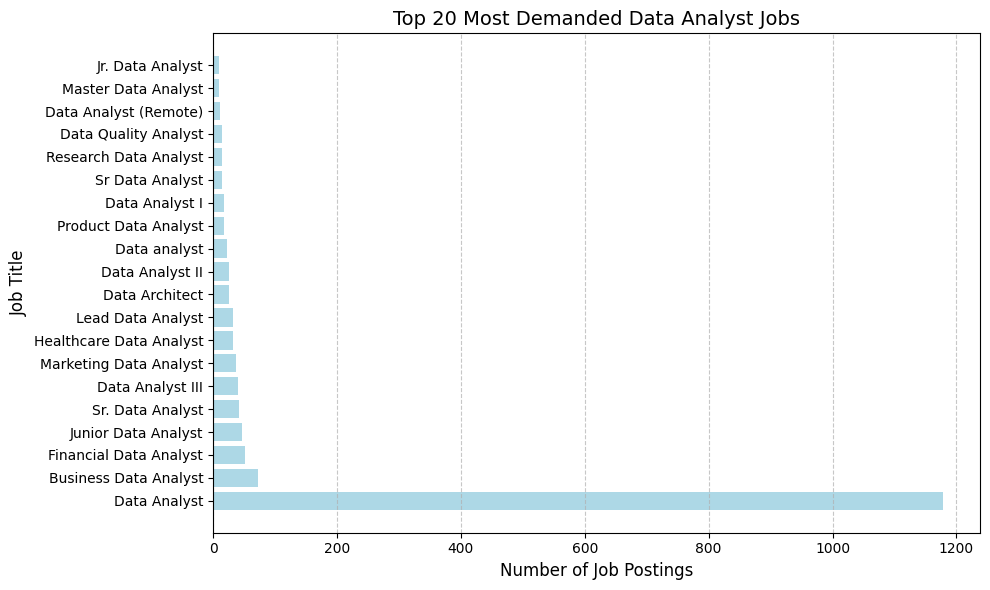

In [178]:
# Plot the most demanded Data Analyst jobs
plt.figure(figsize=(10, 6))
plt.barh(most_demanded_dataanalystjobs.index, most_demanded_dataanalystjobs.values, color='lightblue')
plt.title('Top 20 Most Demanded Data Analyst Jobs', fontsize=14)
plt.xlabel('Number of Job Postings', fontsize=12)
plt.ylabel('Job Title', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


3.2] Job Locations:
Where are most jobs located (country, city)?
Which location offers the highest pay?
Are there specific locations where demand for junior, mid-level, or senior roles is higher?

In [179]:
highest_numberofjob_locations = dfnona['job_country'].value_counts().head(20)
highest_numberofjob_locations

,count
job_country,
United States,14164
Sudan,1498
India,551
Canada,447
United Kingdom,270
Germany,232
France,221
Poland,191
Spain,130


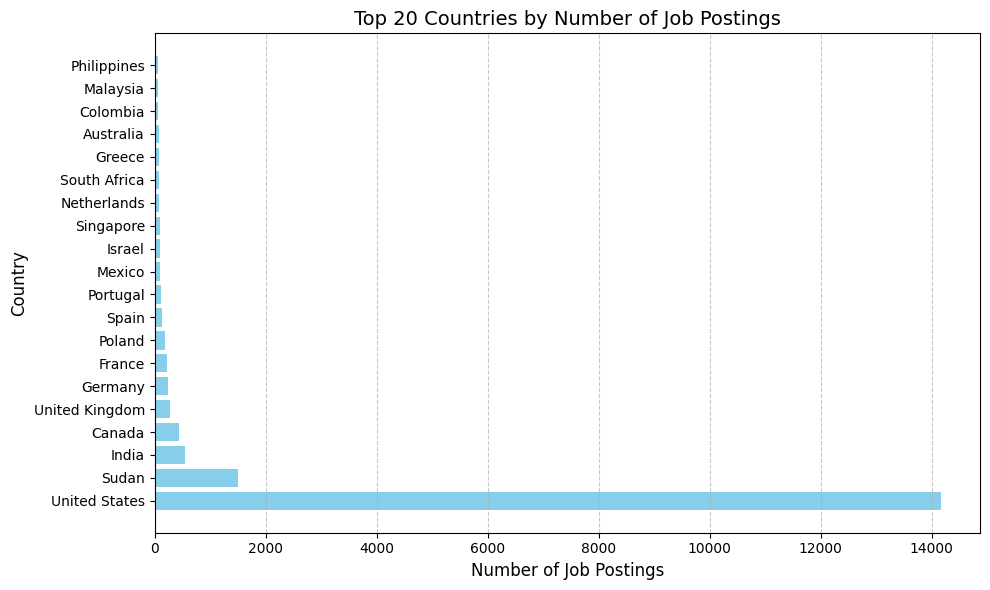

In [180]:
# Plot the data for the highest number of job locations by country
plt.figure(figsize=(10, 6))
plt.barh(highest_numberofjob_locations.index, highest_numberofjob_locations.values, color='skyblue')
plt.title('Top 20 Countries by Number of Job Postings', fontsize=14)
plt.xlabel('Number of Job Postings', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [181]:
#most jobs by city
highest_numberofjob_cities = dfnona['job_location'].value_counts().head(20)
highest_numberofjob_cities

,count
job_location,
Anywhere,3090
"New York, NY",974
United States,483
"San Francisco, CA",476
"Atlanta, GA",411
"Chicago, IL",338
"Washington, DC",310
"Austin, TX",283
"Los Angeles, CA",273


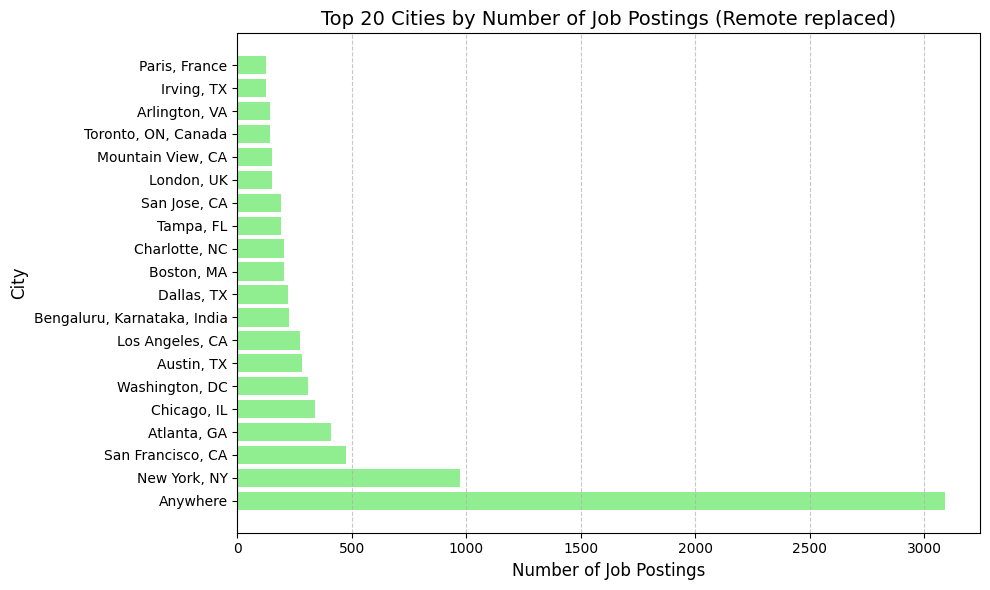

In [182]:
# Remove 'United States' from the job_location column
dfnona = dfnona[dfnona['job_location'] != 'United States']

# Get the updated count of job locations by city
highest_numberofjob_cities = dfnona['job_location'].value_counts().head(20)

# Plot the data for the highest number of job locations by city
plt.figure(figsize=(10, 6))
plt.barh(highest_numberofjob_cities.index, highest_numberofjob_cities.values, color='lightgreen')
plt.title('Top 20 Cities by Number of Job Postings (Remote replaced)', fontsize=14)
plt.xlabel('Number of Job Postings', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [183]:
#now looking at which country pays the highest
highest_pay_country = dfnona.groupby('job_country')['salary_year_avg'].mean().sort_values(ascending=False).head(20)
highest_pay_country

,salary_year_avg
job_country,
Belarus,400000.000000
Russia,283333.333333
Bahamas,201511.619048
Dominican Republic,157500.000000
Northern Mariana Islands,155485.500000
Côte d'Ivoire,147500.000000
Namibia,142166.666667
Sudan,133800.987333
Peru,133337.500000


In [184]:
# out of these countries, sudan, portugal, greece and malaysia stand out because their socioeconomic conditions dont check out with these results
# this is ofc expected due to certain outliers and maybe other issues so lets use median to solve it.
top20_median_salaries = dfnona.groupby('job_country')['salary_year_avg'].median().sort_values(ascending=False).head(20)
top20_median_salaries

,salary_year_avg
job_country,
Belarus,400000.0
Russia,280000.0
Bahamas,208114.0
Dominican Republic,157500.0
Northern Mariana Islands,155485.5
Côte d'Ivoire,147500.0
Tunisia,147500.0
Chile,146000.0
Namibia,141000.0


In [185]:
# belarus being at the top is highly suspicious lets check it out
belarus_jobs = dfnona[dfnona['job_country'] == 'Belarus']
belarus_jobs

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
653444,Data Analyst,Data base administrator,Belarus,via GeekLink,Full-time,False,2023-10-03 11:22:20,True,False,Belarus,year,400000.0,NaN,ЛАНИТ,"['oracle', 'kafka', 'linux', 'git', 'svn']","{'cloud': ['oracle'], 'libraries': ['kafka'], ..."


In [186]:
# so there is only one job in belarus which has extremely high pay- an outlier. since it has only one posting we shall remove belarus entirely from our dataset
dfnona = dfnona[dfnona['job_country'] != 'Belarus']
belarus_jobs = dfnona[dfnona['job_country'] == 'Belarus']
belarus_jobs #perfect

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills


In [187]:
top20_median_salaries

,salary_year_avg
job_country,
Belarus,400000.0
Russia,280000.0
Bahamas,208114.0
Dominican Republic,157500.0
Northern Mariana Islands,155485.5
Côte d'Ivoire,147500.0
Tunisia,147500.0
Chile,146000.0
Namibia,141000.0


In [188]:
# Count the number of job postings for each country
country_job_count = dfnona['job_country'].value_counts().head(20)
country_job_count


,count
job_country,
United States,13832
Sudan,1347
India,551
Canada,447
United Kingdom,270
Germany,232
France,221
Poland,191
Spain,130


In [189]:
# since the top 20 countries with data postings have a min of 59 jobs, we shall use that for stratified median analysis so as to address the sampling size issues
stratifiedsampling_top20_median_salaries = top_20_countries = dfnona['job_country'].value_counts().index
stratifiedsampling_top20_data = dfnona[dfnona['job_country'].isin(top_20_countries)]
stratifiedsampling_top20_median_salaries = stratifiedsampling_top20_data.groupby('job_country')['salary_year_avg'].median().sort_values(ascending=False).head(20)
stratifiedsampling_top20_median_salaries


,salary_year_avg
job_country,
Russia,280000.0
Bahamas,208114.0
Dominican Republic,157500.0
Northern Mariana Islands,155485.5
Côte d'Ivoire,147500.0
Tunisia,147500.0
Chile,146000.0
Namibia,141000.0
Peru,133337.5


In [190]:
#okay so the highest job_country should be something else but its sudan for some reason
dfnona[dfnona['job_country'] == 'Sudan']

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,NaN,Intelletec,"['mongodb', 'mongodb', 'python', 'r', 'sql', '...","{'analyst_tools': ['tableau'], 'cloud': ['orac..."
545,Data Engineer,ERP Data Engineer,"Lansing, MI",via LinkedIn,Full-time,False,2023-01-04 13:58:44,False,False,Sudan,year,80000.0,NaN,Venteon,"['sql', 'sap']","{'analyst_tools': ['sap'], 'programming': ['sq..."
573,Senior Data Engineer,Senior Python Data Engineer,"Wilmington, DE",via Indeed,Full-time,False,2023-09-16 13:13:50,False,False,Sudan,year,160000.0,NaN,Crackajack Solutions,"['python', 'sql', 'java', 'aws', 'databricks',...","{'cloud': ['aws', 'databricks', 'redshift'], '..."
733,Senior Data Engineer,Senior Data Engineer,"Oakland, CA",via LinkedIn,Full-time,False,2023-07-06 13:41:35,False,False,Sudan,year,160000.0,NaN,X4 Life Sciences,"['python', 'sql', 'postgresql', 'sql server', ...","{'cloud': ['aws', 'snowflake'], 'databases': [..."
762,Data Engineer,"Data Engineer, Big Data Privacy and Security","San Jose, CA",via LinkedIn,Full-time,False,2023-06-18 13:38:44,False,True,Sudan,year,171000.0,NaN,TikTok,"['spark', 'kafka']","{'libraries': ['spark', 'kafka']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779816,Senior Data Scientist,Senior Data Scientist (Remote),Anywhere,via Built In,Full-time,True,2023-06-13 06:32:30,False,True,Sudan,year,166500.0,NaN,Billtrust,"['sql', 'python', 'jupyter', 'pytorch', 'tenso...","{'libraries': ['jupyter', 'pytorch', 'tensorfl..."
780008,Data Scientist,Data Scientist,"Irving, TX",via Ai-Jobs.net,Full-time,False,2023-01-06 05:54:41,False,False,Sudan,year,130000.0,NaN,Publicis Groupe,"['python', 'azure', 'databricks', 'spark', 'te...","{'cloud': ['azure', 'databricks'], 'libraries'..."
780050,Data Scientist,"Lead Data Scientist (Colorado Springs, CO)","Denver, CO",via Built In Colorado,Full-time,False,2023-01-22 06:22:28,False,True,Sudan,year,136950.0,NaN,Spectrum,"['r', 'python', 'sql', 'sas', 'sas', 'hadoop',...","{'analyst_tools': ['sas', 'spss', 'alteryx'], ..."
783868,Data Engineer,Data Engineer / San Francisco,"San Francisco, CA",via Motion Recruitment,Full-time,False,2023-04-12 06:59:59,False,False,Sudan,year,145000.0,NaN,Motion Recruitment,"['python', 'sql', 'mongodb', 'mongodb', 'aws',...","{'cloud': ['aws', 'gcp'], 'databases': ['mongo..."


In [191]:
# these are all us cities but the job country is sudan for some reason. it must be replaced.
# these are all us cities but the job country is sudan for some reason. it must be replaced.
dfnona['job_country'].replace('Sudan', 'United States', inplace=True)
# need to update the variable as well
dfnona.loc[dfnona['job_country'] == 'Sudan', 'job_country'] = 'United States'
stratifiedsampling_top20_median_salaries = top_20_countries = dfnona['job_country'].value_counts().head(20).index
stratifiedsampling_top20_data = dfnona[dfnona['job_country'].isin(top_20_countries)]
stratifiedsampling_top20_median_salaries = stratifiedsampling_top20_data.groupby('job_country')['salary_year_avg'].median().sort_values(ascending=False).head(20)
stratifiedsampling_top20_median_salaries
stratifiedsampling_top20_median_salaries = stratifiedsampling_top20_data.groupby('job_country')['salary_year_avg'].median().sort_values(ascending=False).head(20)
stratifiedsampling_top20_median_salaries

<ipython-input-191-06efbb944f3a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfnona['job_country'].replace('Sudan', 'United States', inplace=True)


,salary_year_avg
job_country,
Australia,120000.0
United States,120000.0
Canada,115000.0
India,111175.0
Portugal,111175.0
Brazil,111175.0
Israel,111175.0
Mexico,111175.0
Germany,111175.0


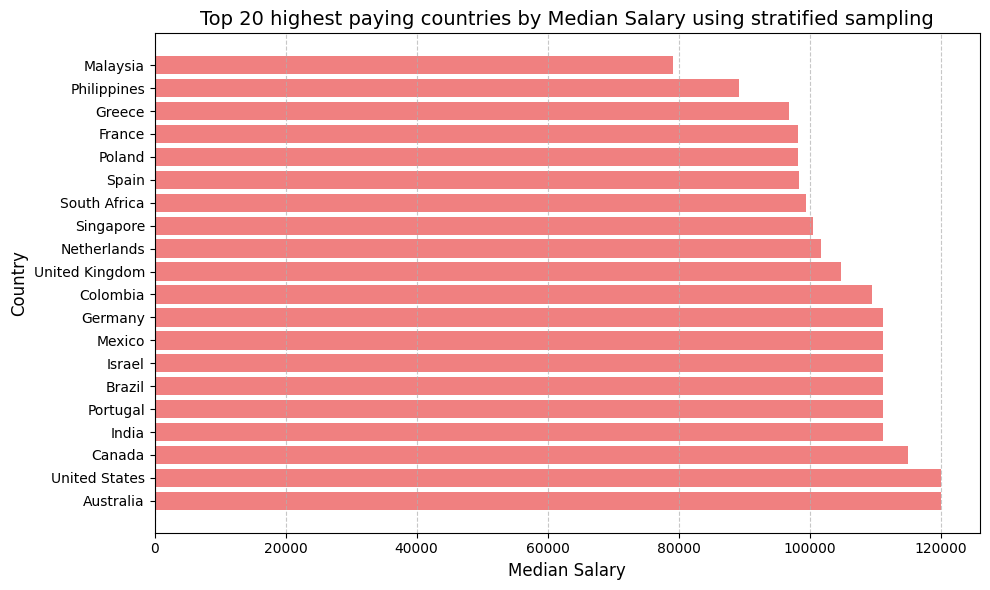

In [192]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.barh(stratifiedsampling_top20_median_salaries.index, stratifiedsampling_top20_median_salaries.values, color='lightcoral')
plt.title('Top 20 highest paying countries by Median Salary using stratified sampling', fontsize=14)
plt.xlabel('Median Salary', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [193]:
# the second method to counter skewed data sampling is using weighed medians instead or normal medians.
# Creating a dictionary to store the weighted median salaries by country
# Create a list to store country and weighted median salary
weighted_medians_data = []
for country, count in country_job_count.items():

    country_data = dfnona[dfnona['job_country'] == country]
    median_salary = country_data['salary_year_avg'].median()
    weighted_medians_data.append({'Country': country, 'Weighted Median Salary': median_salary})

# Convert the list to a pandas DataFrame for easier access later on
weighted_medians_df = pd.DataFrame(weighted_medians_data)
sorted_weighted_medians_df = weighted_medians_df.sort_values(by='Weighted Median Salary', ascending=False)
sorted_weighted_medians_df




,Country,Weighted Median Salary
0,United States,120000.0
16,Australia,120000.0
3,Canada,115000.0
9,Portugal,111175.0
11,Israel,111175.0
2,India,111175.0
10,Mexico,111175.0
5,Germany,111175.0
17,Colombia,109500.0
4,United Kingdom,104834.0


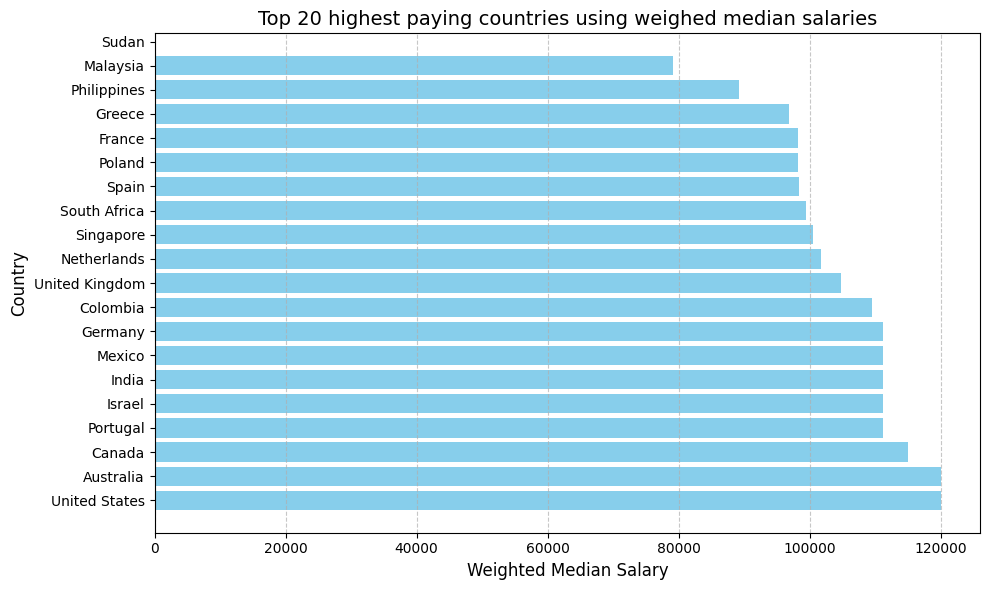

In [194]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.barh(sorted_weighted_medians_df['Country'], sorted_weighted_medians_df['Weighted Median Salary'], color='skyblue')
plt.title('Top 20 highest paying countries using weighed median salaries', fontsize=14)
plt.xlabel('Weighted Median Salary', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [195]:
# now finding the highest paying cities in the US
us_jobs = dfnona[dfnona['job_country'] == 'United States']
city_job_counts = us_jobs['job_location'].value_counts()
weighted_medians_by_city = {}
for city, count in city_job_counts.items():  # Loop through city names and their job counts
    # Filter for jobs in the current city
    city_data = us_jobs[us_jobs['job_location'] == city]

    # Get the median salary for the city
    median_salary = city_data['salary_year_avg'].median()

    # Add the city and its weighted median to the dictionary
    weighted_medians_by_city[city] = median_salary

# Step 5: Convert the dictionary to a DataFrame and sort by median salary
weighted_medians_df = pd.DataFrame.from_dict(weighted_medians_by_city, orient='index', columns=['Weighted Median'])
weighted_medians_df.sort_values(by='Weighted Median', ascending=False, inplace=True)

# Step 6: Display the top 20 cities with the highest weighted medians
print(weighted_medians_df.head(20))


                               Weighted Median
Madison, SD                           960000.0
Dodgeville, WI                        375000.0
Eagan, TN                             375000.0
Boston, NY                            300000.0
San Francisco, CA  (+1 other)         246509.0
New City, NY                          237500.0
Coopersburg, PA                       225000.0
Sierra Vista, AZ                      225000.0
Marengo, IL                           222589.0
Claymont, DE                          216250.0
New York, NY (+3 others)              215000.0
Scranton, PA                          211000.0
Forest Grove, PA                      211000.0
Surry, NH                             211000.0
Long Lake, NY                         211000.0
Poughkeepsie, NY                      211000.0
Ronkonkoma, NY                        211000.0
Takoma Park, MD                       208114.0
Orange, CT                            208114.0
Paris, TX                             208114.0


In [196]:
# madison SD is unusually high almost 2.5 times more then all others, lets check it out
dfnona[dfnona['job_location'] == 'Madison, SD']

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
554784,Data Scientist,Data Scientist,"Madison, SD",via Cooperative Career Center,Full-time,False,2023-05-04 19:06:06,False,True,United States,year,960000.0,NaN,"East River Electric Power Cooperative, Inc.","['java', 'c++', 'python', 'r']","{'programming': ['java', 'c++', 'python', 'r']}"


In [197]:
# one value is artifically inflating the whole city. we shall thus remove it.
dfnona = dfnona.drop(dfnona[dfnona['job_location'] == 'Madison, SD'].index)
us_jobs = dfnona[dfnona['job_country'] == 'United States']
city_job_counts = us_jobs['job_location'].value_counts()
weighted_medians_by_city = {}
for city, count in city_job_counts.items():  # Loop through city names and their job counts
    # Filter for jobs in the current city
    city_data = us_jobs[us_jobs['job_location'] == city]

    # Get the median salary for the city
    median_salary = city_data['salary_year_avg'].median()

    # Add the city and its weighted median to the dictionary
    weighted_medians_by_city[city] = median_salary

# Step 5: Convert the dictionary to a DataFrame and sort by median salary
weighted_medians_df = pd.DataFrame.from_dict(weighted_medians_by_city, orient='index', columns=['Weighted Median'])
weighted_medians_df.sort_values(by='Weighted Median', ascending=False, inplace=True)

# Step 6: Display the top 20 cities with the highest weighted medians
print(weighted_medians_df.head(20))

                               Weighted Median
Dodgeville, WI                        375000.0
Eagan, TN                             375000.0
Boston, NY                            300000.0
San Francisco, CA  (+1 other)         246509.0
New City, NY                          237500.0
Coopersburg, PA                       225000.0
Sierra Vista, AZ                      225000.0
Marengo, IL                           222589.0
Claymont, DE                          216250.0
New York, NY (+3 others)              215000.0
Ronkonkoma, NY                        211000.0
Long Lake, NY                         211000.0
Forest Grove, PA                      211000.0
Scranton, PA                          211000.0
Surry, NH                             211000.0
Poughkeepsie, NY                      211000.0
Paris, TX                             208114.0
Fredericksburg, VA                    208114.0
Takoma Park, MD                       208114.0
Drexel Hill, PA                       208114.0


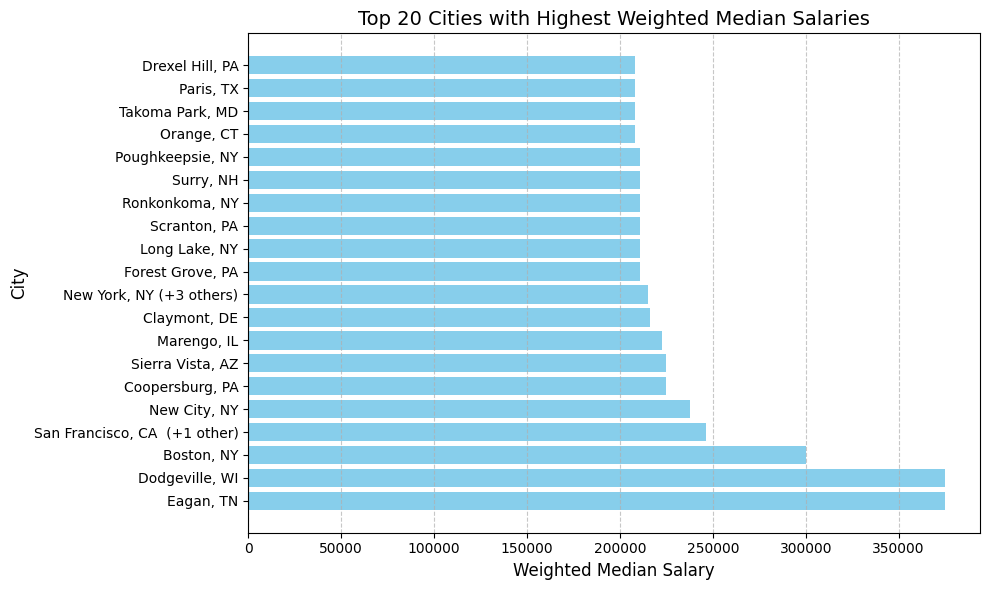

In [198]:
data = {
    'Eagan, TN': 375000.0,
    'Dodgeville, WI': 375000.0,
    'Boston, NY': 300000.0,
    'San Francisco, CA  (+1 other)': 246509.0,
    'New City, NY': 237500.0,
    'Coopersburg, PA': 225000.0,
    'Sierra Vista, AZ': 225000.0,
    'Marengo, IL': 222589.0,
    'Claymont, DE': 216250.0,
    'New York, NY (+3 others)': 215000.0,
    'Forest Grove, PA': 211000.0,
    'Long Lake, NY': 211000.0,
    'Scranton, PA': 211000.0,
    'Ronkonkoma, NY': 211000.0,
    'Surry, NH': 211000.0,
    'Poughkeepsie, NY': 211000.0,
    'Orange, CT': 208114.0,
    'Takoma Park, MD': 208114.0,
    'Paris, TX': 208114.0,
    'Drexel Hill, PA': 208114.0
}

# Converting the dictionary to a DataFrame
df = pd.DataFrame(list(data.items()), columns=['City', 'Weighted Median'])

# Plot
plt.figure(figsize=(10, 6))
plt.barh(df['City'], df['Weighted Median'], color='skyblue')
plt.title('Top 20 Cities with Highest Weighted Median Salaries', fontsize=14)
plt.xlabel('Weighted Median Salary', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


3.3] Work Arrangement:
How many jobs allow remote work?
Are most job titles full-time, part-time, or contract-based?


In [199]:
dfnona

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
28,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,NaN,Netskope,"['gdpr', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['gd..."
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,2023-06-26 14:22:54,False,False,United States,year,140000.0,NaN,Intelletec,"['mongodb', 'mongodb', 'python', 'r', 'sql', '...","{'analyst_tools': ['tableau'], 'cloud': ['orac..."
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"['sql', 'python']","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"['sql', 'r', 'python', 'express']","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"['python', 'r', 'alteryx', 'tableau']","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"['r', 'python', 'matplotlib', 'ggplot2', 'spar...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"['go', 'python', 'r', 'sql', 'oracle', 'window...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"['python', 'azure', 'snowflake', 'spark']","{'cloud': ['azure', 'snowflake'], 'libraries':..."
785682,Data Scientist,Data Scientist für datengetriebene Entwicklung...,"Reutlingen, Germany",via Ai-Jobs.net,Full-time,False,2023-03-04 06:16:08,False,False,Germany,year,157500.0,NaN,Bosch Group,"['python', 'hadoop', 'spark', 'airflow', 'kube...","{'libraries': ['hadoop', 'spark', 'airflow'], ..."


In [200]:
# finding how many jobs allow remote work
remote_jobs_count = dfnona[dfnona['job_work_from_home'] == True].shape[0]

# Total jobs
total_jobs_count = dfnona.shape[0]

# Percentage of remote jobs
remote_jobs_percentage = (remote_jobs_count / total_jobs_count) * 100

print(f"Number of Remote Jobs: {remote_jobs_count}")
print(f"Percentage of Remote Jobs: {remote_jobs_percentage:.2f}%")



Number of Remote Jobs: 3090
Percentage of Remote Jobs: 15.90%


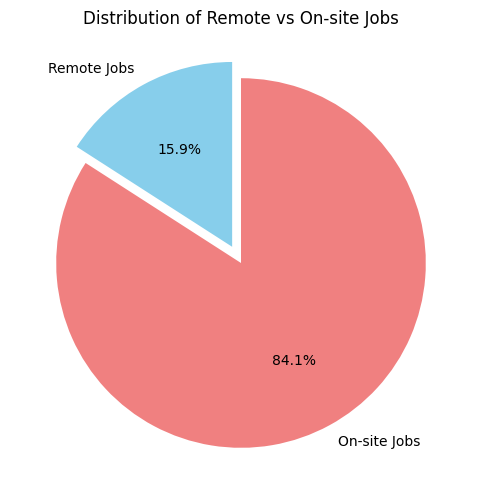

In [201]:
# Data for the plot
categories = ['Remote Jobs', 'On-site Jobs']
values = [remote_jobs_count, total_jobs_count - remote_jobs_count]

# Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(
    values,
    labels=categories,
    autopct='%1.1f%%',
    colors=['skyblue', 'lightcoral'],
    startangle=90,
    explode=(0.1, 0)  # Emphasize the "Remote Jobs" slice
)

# Title
plt.title('Distribution of Remote vs On-site Jobs')

# Show the plot
plt.show()


In [202]:
# now to find types
dfnona['job_schedule_type'].unique()

array(['Full-time', 'Internship', 'Contractor', 'Part-time',
       'Full-time and Contractor', 'Full-time and Part-time',
       'Full-time and Internship', 'Full-time, Contractor, and Temp work',
       'Full-time, Part-time, and Internship', None, 'Temp work',
       'Full-time and Temp work', 'Full-time, Part-time, and Contractor',
       'Full-time, Contractor, and Internship',
       'Contractor and Temp work', 'Full-time and Per diem',
       'Internship and Full-time', 'Part-time and Full-time',
       'Part-time and Contractor', 'Part-time, Contractor, and Temp work',
       'Full-time, Temp work, and Internship'], dtype=object)

In [203]:
# Count the number of occurrences of each schedule type
schedule_counts = dfnona['job_schedule_type'].value_counts()

# Calculate the percentages
schedule_percentages = (schedule_counts / len(dfnona)) * 100

# Combine counts and percentages into a DataFrame for better readability
schedule_summary = pd.DataFrame({
    'Count': schedule_counts,
    'Percentage': schedule_percentages
}).reset_index()

schedule_summary.columns = ['Schedule Type', 'Count', 'Percentage']
schedule_summary


,Schedule Type,Count,Percentage
0,Full-time,18591,95.657319
1,Contractor,361,1.857474
2,Full-time and Part-time,287,1.476717
3,Part-time,53,0.272704
4,Full-time and Contractor,37,0.190378
5,Internship,22,0.113198
6,Full-time and Temp work,17,0.087471
7,Temp work,13,0.066890
8,Full-time and Internship,10,0.051454
9,"Full-time, Part-time, and Internship",9,0.046308


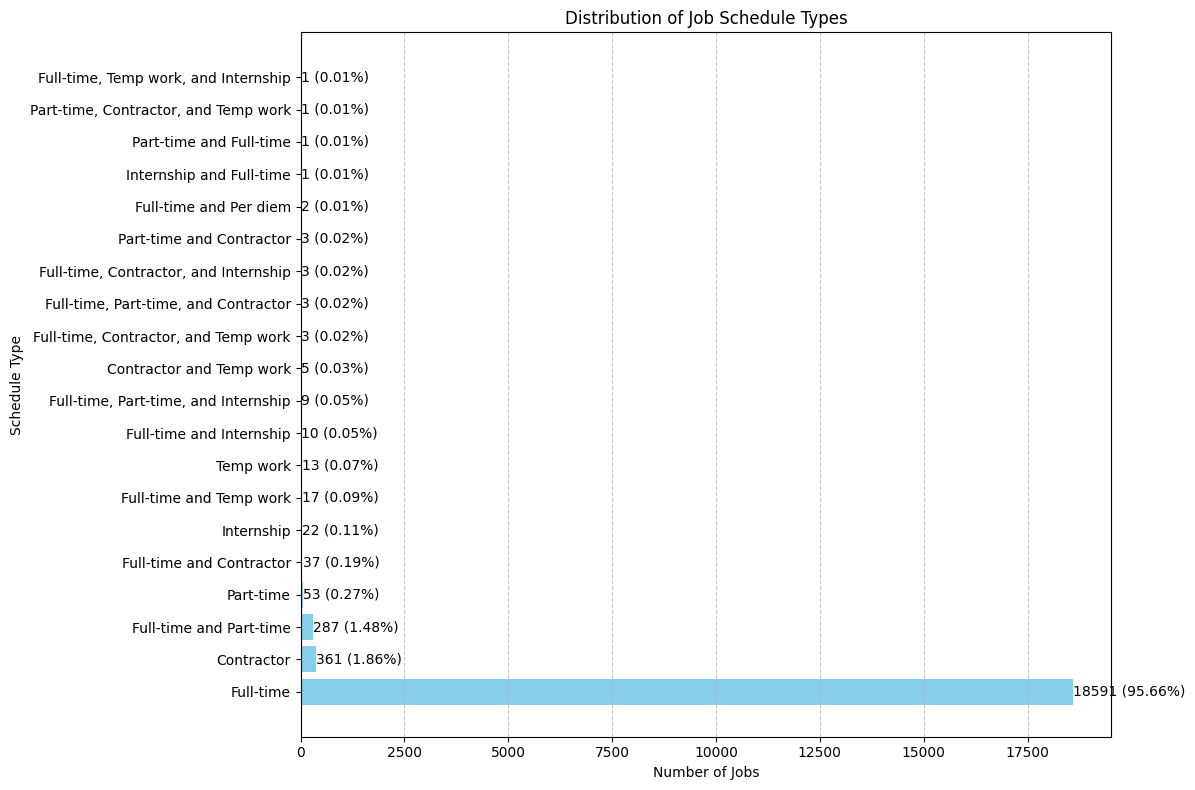

In [204]:
# Plotting
plt.figure(figsize=(12, 8))

# Bar chart for schedule types
plt.barh(schedule_summary['Schedule Type'], schedule_summary['Count'], color='skyblue')

# Adding labels and title
plt.xlabel('Number of Jobs')
plt.ylabel('Schedule Type')
plt.title('Distribution of Job Schedule Types')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display percentages next to bars
for index, value in enumerate(schedule_summary['Count']):
    plt.text(value + 10, index, f"{value} ({schedule_summary['Percentage'][index]:.2f}%)", va='center')

plt.tight_layout()
plt.show()


3.4] Posting Trends: Which month has the highest number of job postings? Are there patterns in job postings over time (e.g., seasonal hiring)?

In [205]:
dfnona

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
28,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,NaN,Netskope,"['gdpr', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['gd..."
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,2023-06-26 14:22:54,False,False,United States,year,140000.0,NaN,Intelletec,"['mongodb', 'mongodb', 'python', 'r', 'sql', '...","{'analyst_tools': ['tableau'], 'cloud': ['orac..."
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"['sql', 'python']","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"['sql', 'r', 'python', 'express']","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"['python', 'r', 'alteryx', 'tableau']","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"['r', 'python', 'matplotlib', 'ggplot2', 'spar...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"['go', 'python', 'r', 'sql', 'oracle', 'window...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"['python', 'azure', 'snowflake', 'spark']","{'cloud': ['azure', 'snowflake'], 'libraries':..."
785682,Data Scientist,Data Scientist für datengetriebene Entwicklung...,"Reutlingen, Germany",via Ai-Jobs.net,Full-time,False,2023-03-04 06:16:08,False,False,Germany,year,157500.0,NaN,Bosch Group,"['python', 'hadoop', 'spark', 'airflow', 'kube...","{'libraries': ['hadoop', 'spark', 'airflow'], ..."


In [206]:
dfnona['posting_month'] = dfnona['job_posted_date'].dt.month
monthly_postings = dfnona['posting_month'].value_counts().sort_index()

# Create a DataFrame for better readability
monthly_postings_df = monthly_postings.reset_index()
monthly_postings_df.columns = ['Month', 'Job Postings']

# Sort by month (1 = January, 12 = December)
monthly_postings_df = monthly_postings_df.sort_values(by='Month')

# Add percentage of total postings for each month
monthly_postings_df['Percentage'] = (monthly_postings_df['Job Postings'] / dfnona.shape[0]) * 100

# Print the result
print(monthly_postings_df)

# Find the month with the highest postings
highest_month = monthly_postings_df.loc[monthly_postings_df['Job Postings'].idxmax()]
print(f"Month with the highest job postings: {highest_month['Month']} ({highest_month['Job Postings']} postings)")


    Month  Job Postings  Percentage
0       1          2034   10.465655
1       2          1785    9.184461
2       3          2004   10.311294
3       4          1690    8.695652
4       5          1705    8.772833
5       6          2106   10.836120
6       7          1961   10.090044
7       8          1885    9.698997
8       9          1049    5.397479
9      10          1130    5.814253
10     11           934    4.805763
11     12          1152    5.927450
Month with the highest job postings: 6.0 (2106.0 postings)


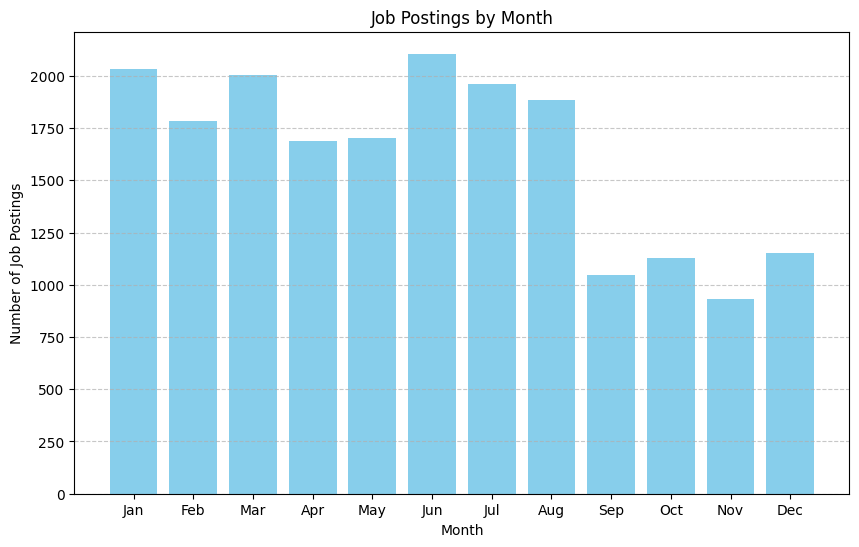

In [207]:

# Plotting the trends
plt.figure(figsize=(10, 6))
plt.bar(monthly_postings_df['Month'], monthly_postings_df['Job Postings'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')
plt.title('Job Postings by Month')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


3.5] Skills and Requirements:
What are the most commonly sought-after skills?
How often do specific skills (e.g., Python, SQL) appear together?
How many jobs require a degree versus those that don’t?

In [208]:
dfnona

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,posting_month
28,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,NaN,Netskope,"['gdpr', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['gd...",8
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,2023-06-26 14:22:54,False,False,United States,year,140000.0,NaN,Intelletec,"['mongodb', 'mongodb', 'python', 'r', 'sql', '...","{'analyst_tools': ['tableau'], 'cloud': ['orac...",6
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"['sql', 'python']","{'programming': ['sql', 'python']}",2
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"['sql', 'r', 'python', 'express']","{'programming': ['sql', 'r', 'python'], 'webfr...",7
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"['python', 'r', 'alteryx', 'tableau']","{'analyst_tools': ['alteryx', 'tableau'], 'pro...",10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"['r', 'python', 'matplotlib', 'ggplot2', 'spar...","{'analyst_tools': ['word', 'power bi', 'tablea...",1
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"['go', 'python', 'r', 'sql', 'oracle', 'window...","{'analyst_tools': ['alteryx', 'power bi', 'tab...",8
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"['python', 'azure', 'snowflake', 'spark']","{'cloud': ['azure', 'snowflake'], 'libraries':...",4
785682,Data Scientist,Data Scientist für datengetriebene Entwicklung...,"Reutlingen, Germany",via Ai-Jobs.net,Full-time,False,2023-03-04 06:16:08,False,False,Germany,year,157500.0,NaN,Bosch Group,"['python', 'hadoop', 'spark', 'airflow', 'kube...","{'libraries': ['hadoop', 'spark', 'airflow'], ...",3


In [209]:
dfnona['job_skills'].info()

<class 'pandas.core.series.Series'>
Index: 19435 entries, 28 to 785692
Series name: job_skills
Non-Null Count  Dtype 
--------------  ----- 
19435 non-null  object
dtypes: object(1)
memory usage: 303.7+ KB


In [211]:
dfnona['job_skills']


,job_skills
28,"['gdpr', 'excel']"
77,"['mongodb', 'mongodb', 'python', 'r', 'sql', '..."
92,"['sql', 'python']"
100,"['sql', 'r', 'python', 'express']"
109,"['python', 'r', 'alteryx', 'tableau']"
...,...
785563,"['r', 'python', 'matplotlib', 'ggplot2', 'spar..."
785624,"['go', 'python', 'r', 'sql', 'oracle', 'window..."
785648,"['python', 'azure', 'snowflake', 'spark']"
785682,"['python', 'hadoop', 'spark', 'airflow', 'kube..."


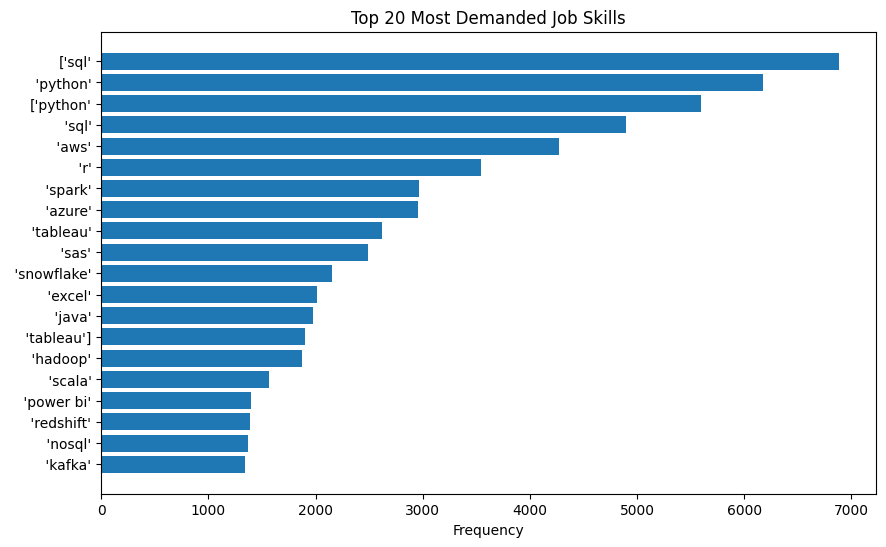

In [219]:
from collections import Counter

dfnona['job_skills'] = dfnona['job_skills'].apply(lambda x: x if isinstance(x, list) else x.split(','))
# this is instance x,list will leave all the list values alone. however if its a string like these are it converts them into lists as we know they are being separated by commas.

# Flattening the job skills list across the entire dataframe
all_skills = sum(dfnona['job_skills'], [])

# Count the frequency of each skill
skill_counts = Counter(all_skills)

# Convert the counts to a DataFrame for easy plotting
skill_counts_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Frequency'])
skill_counts_df = skill_counts_df.sort_values(by='Frequency', ascending=False)

# Plot the most common skills
plt.figure(figsize=(10, 6))
plt.barh(skill_counts_df['Skill'][:20], skill_counts_df['Frequency'][:20])  # top 20 skills
plt.xlabel('Frequency')
plt.title('Top 20 Most Demanded Job Skills')
plt.gca().invert_yaxis()  # Invert y-axis to have the most common skill at the top
plt.show()


